### Library

In [ ]:
import pandas as pd
import re

import string
import csv

### Menggabungkan data YT & TWT

In [ ]:
df_1 = pd.read_csv(input("Masukan file csv 1: "))
df_2 = pd.read_csv(input("Masukan file csv 2: "))

In [ ]:
from functools import reduce
df_mix=[df_1, df_2]
df_merged = reduce(lambda  left,right: pd.merge(left,right,how='outer'), df_mix)

In [ ]:
df_merged

In [ ]:
namecsv = input('name csv: ')
df_merged.to_csv(namecsv, index = False, header = True,index_label=None)

### Data Preproccesing

In [ ]:
Data = pd.read_csv(input('input csv: '))

input csv: wuling_final.csv


In [ ]:
df = pd.DataFrame(Data)
# df["text"] = df[0]

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('rt', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(' +', ' ', text)
    return text

df['text'] = df['text'].apply(lambda x:clean_text(x))
df.head(10)

,text
0,sama sepei yang om fitra katakan saya berharap...
1,design
2,integritas dan kejujuran buat om fitra eri diuji
3,wuling keren futuristic hoply vendor dr negara...
4,wuling jadi contoh peama pentingnya pengawasan...
5,sukses selalu omsmg info yang diberikan berman...
6,kelebihan mobil ini juga pajak tahunannya udah...
7,baru tau klo air ev ini penggerak roda belakan...
8,aku lama tak setir mobil dikasih test drive in...
9,terimakasih wuling semoga yg lain pada melék


In [ ]:
#Membuang data duplikat
df.drop_duplicates(inplace=True)

In [ ]:
len(df)

2662

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# fungsi tokenisasi (Memecah kalimat menjadi beberapa kata)
from nltk.tokenize import word_tokenize
def tokenizingText(text):
    text = word_tokenize(text)
    return text

In [ ]:
df['text_preprocessed'] = df['text'].apply(tokenizingText)

In [ ]:
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
def filteringText(text): # Remove stopwors in a text
    listStopwords = stopwords.words('indonesian')
    listStopwords.extend(['dengan', 'ia','bahwa','oleh','aku', 'kamu'
                                    'list',' " ','ya','yuk','kak','yg','po','gak',
                                    'ke','bgt','lg','gw','aja','gini','wik','kalo','ga',
                                    'dom','yah','gada','nya','jdi','sih','gue','gua','dah',
                                    'ni','lu','ayo','vs','v','ioniq','Ioniq','Hyundai','hyundai',
                                    'Tesla','tesla','wuling','Wuling','Ev','ev','Air','air',
                                    'mobil','indonesia','liat','sdh','dgn','masuk','terima kasih','terimakasih',
                                    'terima','kasih','Terimakasih','Terima kasih','masuk','motors','nnti','fitra',
                                    'eri','kalimat','kalimatkalimat','mendorong','om','Om','bikin','sepei'])
    listStopwords = set(listStopwords)
    filtered = []
    for txt in text:
      if txt not in listStopwords:
                    filtered.append(txt)
    text = filtered             
    return text


In [ ]:
df['text_preprocessed'] = df['text_preprocessed'].apply(filteringText)

In [ ]:
lexicon_positive = dict()
with open('positive_lex.csv', 'r') as csvfile:
    pos_word = csv.reader(csvfile, delimiter=',')
    next(pos_word, None)
    for row in pos_word:
      lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
with open('negatif_lex.csv', 'r') as csvfile:
    neg_word = csv.reader(csvfile, delimiter=',')
    next(neg_word, None)
    for row in neg_word:
      lexicon_negative[row[0]] = int(row[1])

In [ ]:
def sentiment_analysis(text):
            score = 0
            for word in text:
                if (word in lexicon_positive):
                    score = score + lexicon_positive[word]
            for word in text:
                if (word in lexicon_negative):
                    score = score + lexicon_negative[word]
            sentimen=''
            if (score > 0):
                sentimen = 'positive'
            elif (score < 0):
                sentimen = 'negative'
            else:
                sentimen = 'neutral'
            return score, sentimen

In [ ]:
results = df['text_preprocessed'].apply(sentiment_analysis)
results = list(zip(*results))
df['sentimen_score'] = results[0]
df['sentimen'] = results[1]
print(df['sentimen'].value_counts())

# plt.figure(figsize=(12,6))
# sns.countplot(x='sentimen',data=df_fix)

negative    953
positive    944
neutral     765
Name: sentimen, dtype: int64


# Menyimpan Dataset yang sudah digabungkan dan dibersihkan

In [ ]:
namecsv = input('name csv: ')
df.to_csv(namecsv, index = False, header = True,index_label=None)

# ALL Visualisasi

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

neutral     868
positive    831
negative    815
Name: sentimen, dtype: int64


,text,text_preprocessed,sentimen_score,sentimen
0,terima kasih hyundai motors indonesia telah be...,"berusaha, memenuhi, konsumen, listrik, berfitu...",7,positive
1,sdh liat review dari mat watson carwow dan skr...,"review, mat, watson, carwow, skrg, ionic, indo...",9,positive
2,fun fact relax mode yang disebut om fitra dise...,"fun, fact, relax, mode, om, fitra, zero, gravi...",0,neutral
3,hyundai speinya susah dikejar dalam perlombaan...,"speinya, susah, dikejar, perlombaan, listrik, ...",4,positive
4,keren semoga di mendatang semakin banyak bermu...,"keren, semoga, bermunculan, listrik, affordable",0,neutral
...,...,...,...,...
2509,setuju kawan pakai hyundai ioniq pn masih mai...,"setuju, kawan, pakai, pn, maintain, km, tank, gu…",1,positive
2510,ioniq indent sepeinya karena diekspor semua da...,"indent, sepeinya, diekspor, negeri, kebagian",0,neutral
2511,hyundai ioniq eks ktt bali harga normal tanpa ...,"eks, ktt, bali, harga, normal, indent, sold, o...",1,positive
2512,kia y hyundai ioniq,"kia, y",0,neutral


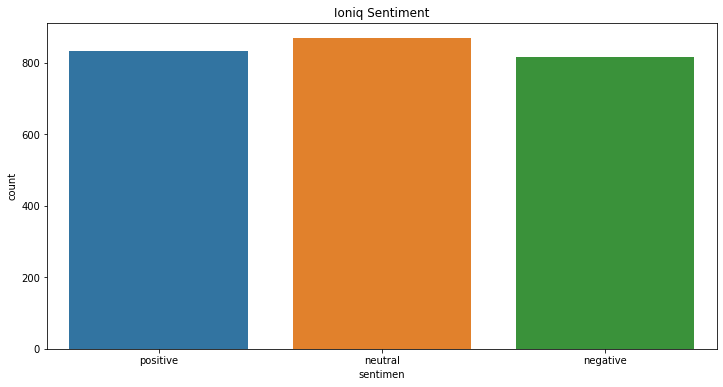

In [ ]:
df_fix = pd.read_csv('ioniq-sentimen.csv')
plt.figure(figsize=(12,6))
print(df_fix['sentimen'].value_counts())
sns.countplot(x='sentimen',data=df_fix).set(title='Ioniq Sentiment')
df_fix

negative    953
positive    944
neutral     765
Name: sentimen, dtype: int64


,text,text_preprocessed,sentimen_score,sentimen
0,sama sepei yang om fitra katakan saya berharap...,"berharap, pemicu, populer, pabrikanpabrikan, m...",6,positive
1,design,design,0,neutral
2,integritas dan kejujuran buat om fitra eri diuji,"integritas, kejujuran, diuji",0,neutral
3,wuling keren futuristic hoply vendor dr negara...,"keren, futuristic, hoply, vendor, dr, negara, ...",0,neutral
4,wuling jadi contoh peama pentingnya pengawasan...,"contoh, peama, pengawasan, charger, kendaraan,...",-6,negative
...,...,...,...,...
2657,mantap banget nih wuling air ev,"mantap, banget, nih",6,positive
2658,biaya servis wuling air ev murahnya bikin heran,"biaya, servis, murahnya, heran",4,positive
2659,mostpopuler bikin heran pajak tahunan wuling a...,"mostpopuler, heran, pajak, tahunan, segini",-2,negative
2660,bikin heran pajak tahunan wuling air ev ternya...,"heran, pajak, tahunan, segini",-2,negative


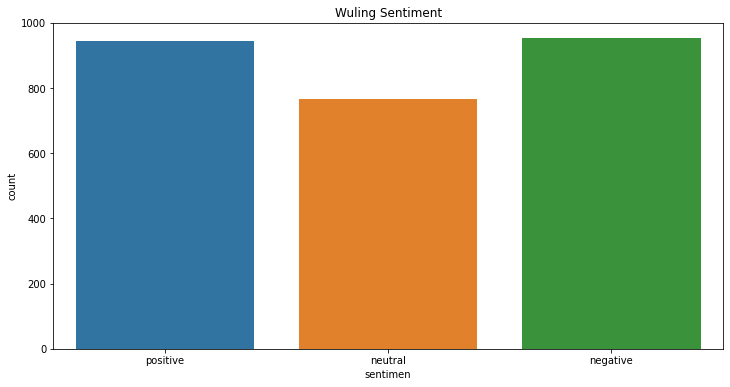

In [ ]:
df_fix = pd.read_csv('wuling-sentimen.csv')
plt.figure(figsize=(12,6))
print(df_fix['sentimen'].value_counts())
sns.countplot(x='sentimen',data=df_fix).set(title='Wuling Sentiment')
df_fix

neutral     1100
negative    1093
positive     902
Name: sentimen, dtype: int64


,text,text_preprocessed,sentimen_score,sentimen
0,dulu aku bermimpi memiliki mobil lamborghini o...,"bermimpi, memiliki, lamborghini, or, aston, ma...",-3,negative
1,yg bikin gw takjub bukan cuma mobilnya tapi ka...,"bikin, takjub, mobilnya, visioner, emosional, ...",3,positive
2,desainnya benerbener futuristik teknologi max ...,"desainnya, benerbener, futuristik, teknologi, ...",-1,negative
3,sampean memang salah satu maestro pengamat oto...,"sampean, salah, maestro, pengamat, otomotif, s...",-4,negative
4,udah pernah liat bbrapa review ttg tesla dr lu...,"udah, bbrapa, review, ttg, dr, tp, ttp, beda, ...",6,positive
...,...,...,...,...
3090,si elon ini aslinya tetangganya pak hao lahir...,"si, elon, aslinya, tetangganya, hao, lahirnya,...",0,neutral
3091,ya semoga cepet kebeli tesla,"semoga, cepet, kebeli",2,positive
3092,tapi porsche carrera ini k…,"porsche, carrera, k…",0,neutral
3093,nnti ak beliin saham tesla mbak,"ak, beliin, saham, mbak",-1,negative


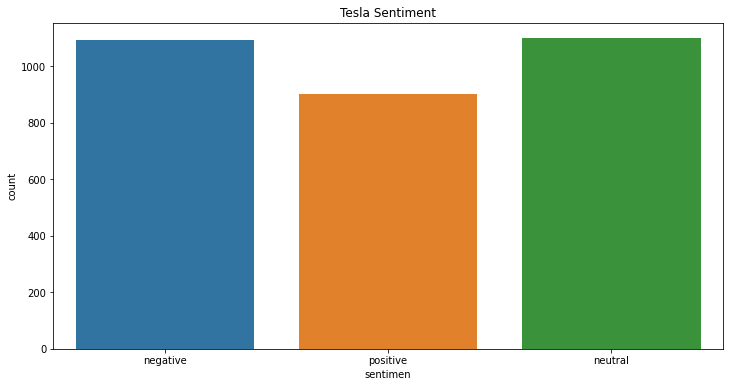

In [ ]:
df_fix = pd.read_csv('tesla-sentimen.csv')
plt.figure(figsize=(12,6))
print(df_fix['sentimen'].value_counts())
sns.countplot(x='sentimen',data=df_fix).set(title='Tesla Sentiment')
df_fix

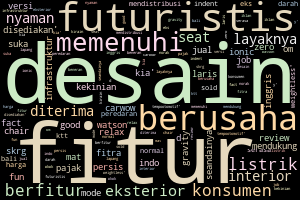

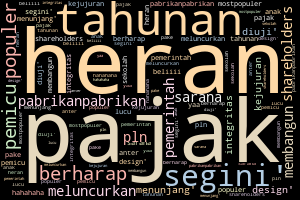

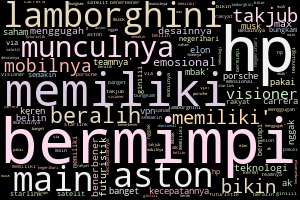

In [ ]:
from PIL import Image
display(Image.open('ioniq-wordcloud.png'))
display(Image.open('wuling-wordcloud.png'))
display(Image.open('tesla-wordcloud.png'))

# Trash

In [ ]:
df['text_preprocessed']=df['text_preprocessed'].apply(', '.join)
df_neutral = df[df["sentimen"] == 'neutral']
df_positive = df[df["sentimen"] == 'positive']
df_negative = df[df["sentimen"] == 'negative']

In [ ]:
df_f = pd.read_csv(input('input csv: '))

input csv: ioniq-sentimen.csv


In [ ]:
df_f.head()

,text,text_preprocessed,sentimen_score,sentimen
0,terima kasih hyundai motors indonesia telah be...,"berusaha, memenuhi, konsumen, listrik, berfitu...",7,positive
1,sdh liat review dari mat watson carwow dan skr...,"review, mat, watson, carwow, skrg, ionic, indo...",9,positive
2,fun fact relax mode yang disebut om fitra dise...,"fun, fact, relax, mode, om, fitra, zero, gravi...",0,neutral
3,hyundai speinya susah dikejar dalam perlombaan...,"speinya, susah, dikejar, perlombaan, listrik, ...",4,positive
4,keren semoga di mendatang semakin banyak bermu...,"keren, semoga, bermunculan, listrik, affordable",0,neutral


In [ ]:
df_f[df_f['sentimen'] == 'negative'].sort_values(by='sentimen_score').head()

,text,text_preprocessed,sentimen_score,sentimen
1722,kalau ngomongin harga maju mundur tp akhirnya ...,"ngomongin, harga, maju, mundur, tp, ambil, dip...",-26,negative
1651,halah cuma ioniq unit doang kalah sama esemka ...,"halah, unit, doang, kalah, esemka, mencapai, u...",-26,negative
361,menurut sy model nya terlalu retro terlalu sim...,"sy, model, retro, simple, tdk, mengambarkan, a...",-25,negative
1103,om yg sampai sekarang belum ada yg review untu...,"om, review, ngecas, tarik, memanfaatkan, siste...",-20,negative
1461,mau tanya ijin koreksi kalo salah ini kan paka...,"ijin, koreksi, salah, pakai, baterai, salah, b...",-20,negative
